In [1]:
#Loading the packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:/Users/Shreyansh Upadhyay/Desktop/Data Science/Loan Prediction')
#Reading the data
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

In [2]:
train_original=train.copy()
test_original=test.copy()

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.shape, test.shape

((614, 13), (367, 12))

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

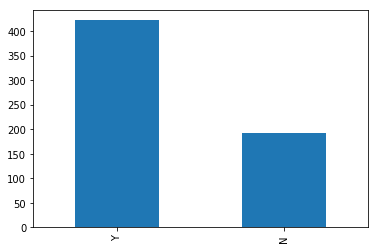

In [9]:
train['Loan_Status'].value_counts().plot.bar()

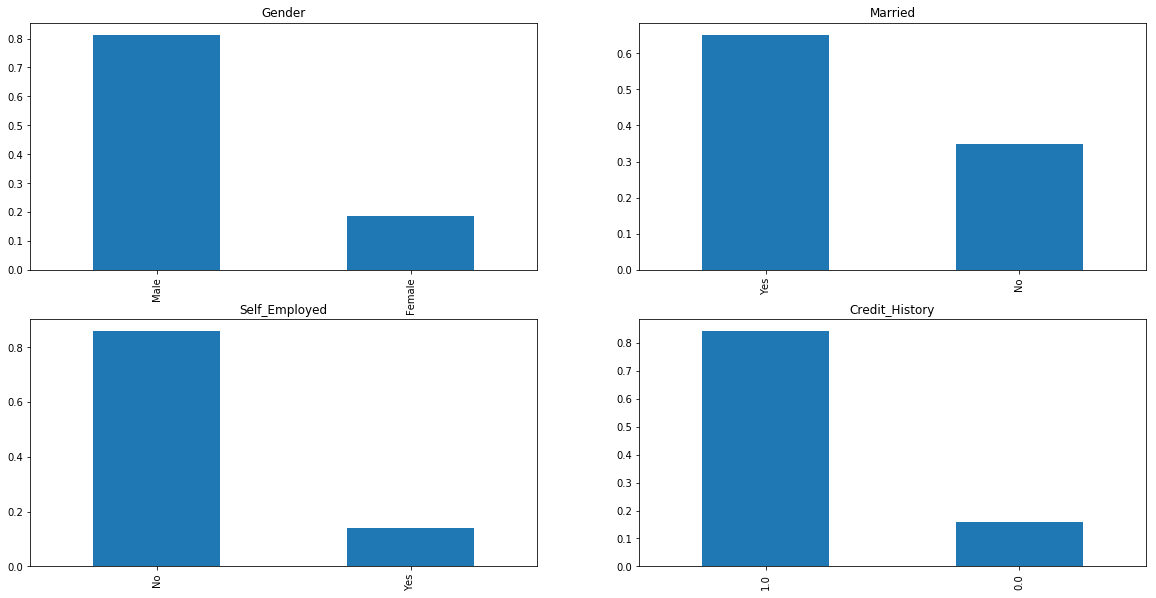

In [10]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Credit_History')
plt.show()

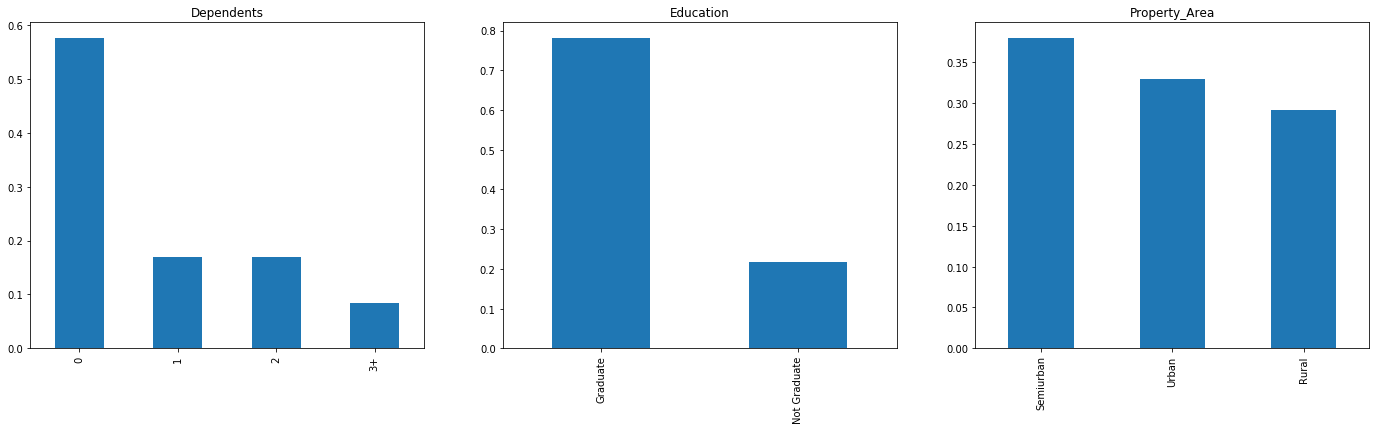

In [11]:
#Independent Variable(ordinal)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Property_Area')
plt.show()

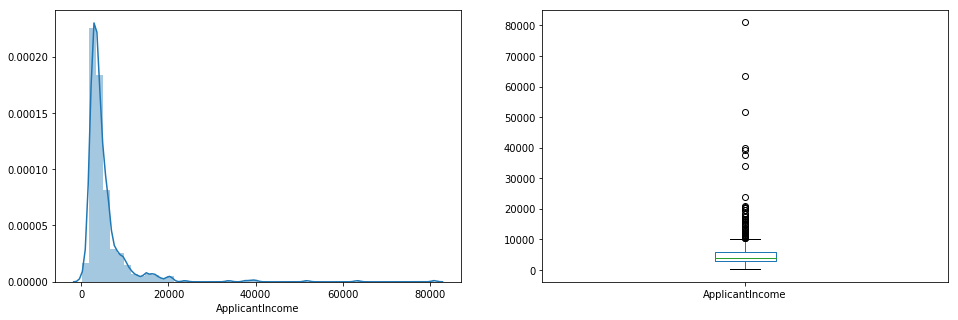

In [12]:
#Independent Variable(numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

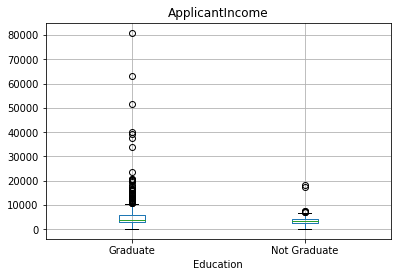

In [13]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

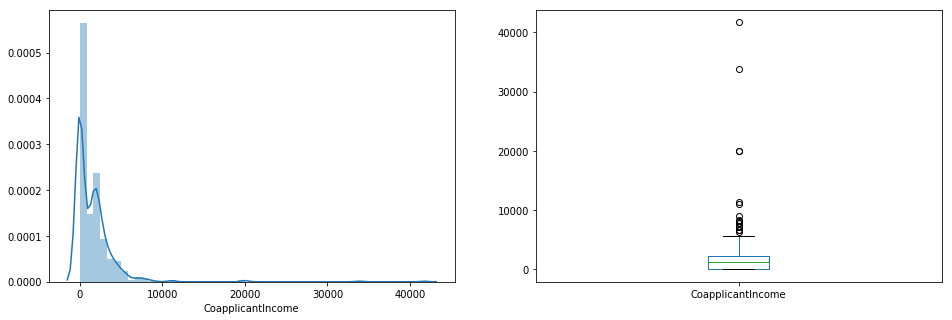

In [14]:
#CoApplicant Income distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

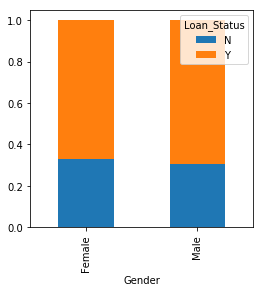

In [15]:
Gender=pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

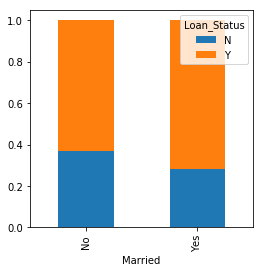

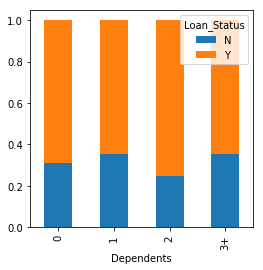

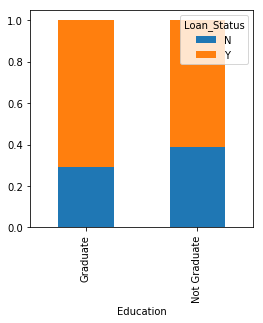

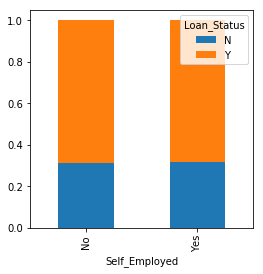

In [16]:
#Now visualize the remaining categorical variables with target
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Education=pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

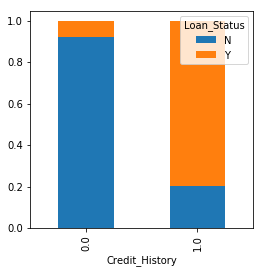

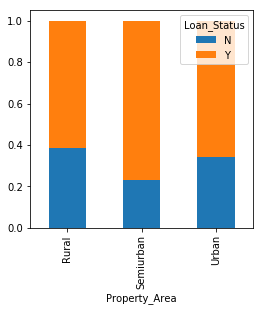

In [17]:
Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

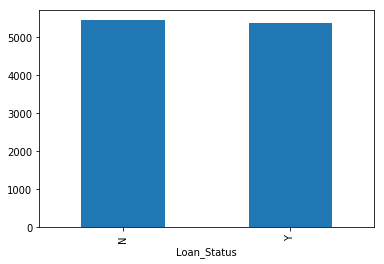

In [18]:
#Numerical Independent Variable Vs Target Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

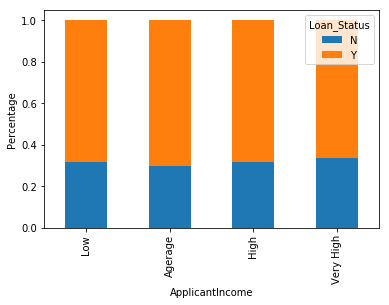

In [19]:
bins=[0, 2500, 4000, 6000, 81000]
group=['Low', 'Agerage', 'High', 'Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'], bins, labels=group)
Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
p=plt.ylabel('Percentage')

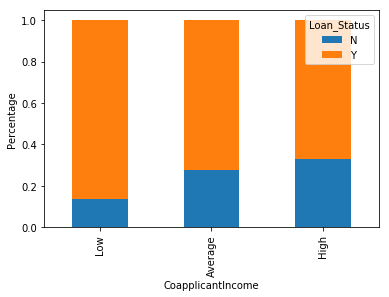

In [20]:
bins=[0, 1000, 3000, 42000]
group=['Low', 'Average', 'High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("CoapplicantIncome")
P=plt.ylabel("Percentage")

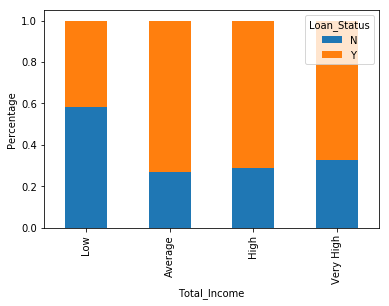

In [21]:
#Effect of Total Income on Loan-Status by combining Coapplicant and Applicant Income
train['Total_Income']= train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0, 2500, 4000, 6000, 81000]
group=['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'], bins, labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
p=plt.ylabel('Percentage')

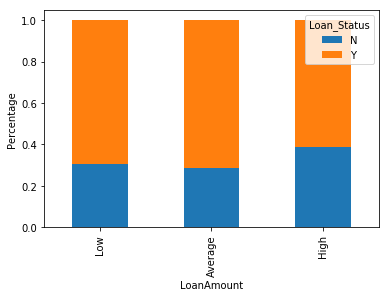

In [22]:
#Loan amount variable visualization
bins=[0,100,200,700]
group=['Low', 'Average', 'High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'], bins, labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
p=plt.ylabel('Percentage')

In [23]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+',3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)
train['Loan_Status'].replace('N',0, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)

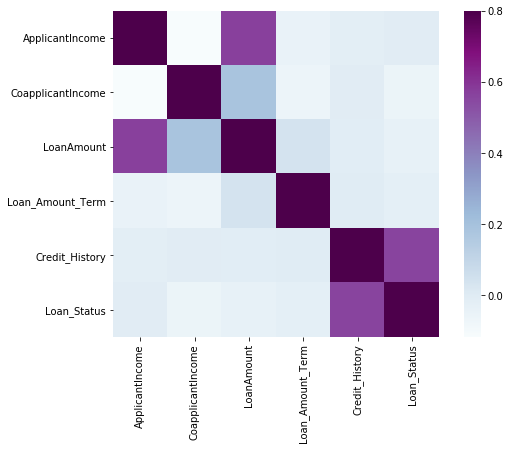

In [24]:
#Now Let us visualize the corelation between all the numerical varaibles
matrix=train.corr()
f, ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [25]:
#Missing value and outlier treatment
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [27]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [29]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [30]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

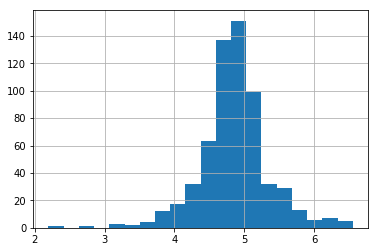

In [32]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [33]:
#Model building 
train=train.drop('Loan_ID', axis=1)
test=test.drop('Loan_ID', axis=1)

In [34]:
x=train.drop('Loan_Status',1)
y=train.Loan_Status

In [35]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xcv,ytrain,ycv=train_test_split(x,y, test_size=0.3)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
model=LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
pred_cv=model.predict(xcv)

In [40]:
accuracy_score(ycv, pred_cv)

0.7837837837837838

In [41]:
pred_test=model.predict(test)

In [42]:
submission=pd.read_csv('sample_submission_49d68Cx.csv')

In [43]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [44]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [45]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')